In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car_data.csv")
df

,Brand,Fuel_Type,Year,Mileage,Price
0,Honda,Petrol,2018,35000,500000
1,BMW,Diesel,2016,60000,650000
2,Toyota,Petrol,2019,30000,550000
3,Hyundai,Diesel,2015,70000,400000
4,Ford,Petrol,2017,45000,480000
5,Honda,Diesel,2020,20000,620000
6,BMW,Petrol,2018,32000,700000
7,Toyota,Diesel,2017,55000,470000
8,Hyundai,Petrol,2016,50000,430000
9,Ford,Diesel,2019,25000,520000


In [19]:
X= df.drop("Price",axis=1)
y= df["Price"]

In [20]:
X,y

(     Brand Fuel_Type  Year  Mileage
 0    Honda    Petrol  2018    35000
 1      BMW    Diesel  2016    60000
 2   Toyota    Petrol  2019    30000
 3  Hyundai    Diesel  2015    70000
 4     Ford    Petrol  2017    45000
 5    Honda    Diesel  2020    20000
 6      BMW    Petrol  2018    32000
 7   Toyota    Diesel  2017    55000
 8  Hyundai    Petrol  2016    50000
 9     Ford    Diesel  2019    25000,
 0    500000
 1    650000
 2    550000
 3    400000
 4    480000
 5    620000
 6    700000
 7    470000
 8    430000
 9    520000
 Name: Price, dtype: int64)

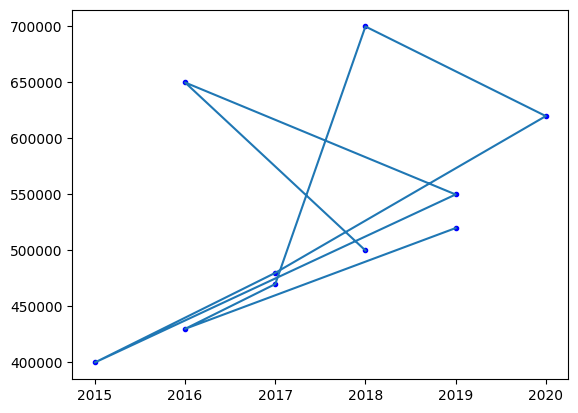

In [21]:
%matplotlib inline
plt.scatter(df[['Year']],df['Price'],color="blue",marker=".")
plt.plot(df['Year'],df['Price'])

In [71]:
from sklearn.model_selection import train_test_split
X= df.drop("Price",axis=1)
y= df["Price"]


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
len(X_train)

8

In [87]:
len(y_train)

8

In [88]:
X_train

,Brand,Fuel_Type,Year,Mileage
5,Honda,Diesel,2020,20000
0,Honda,Petrol,2018,35000
7,Toyota,Diesel,2017,55000
2,Toyota,Petrol,2019,30000
9,Ford,Diesel,2019,25000
4,Ford,Petrol,2017,45000
3,Hyundai,Diesel,2015,70000
6,BMW,Petrol,2018,32000


In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [90]:
categorical = ['Brand', 'Fuel_Type']
numerical = ['Year', 'Mileage'] # 

In [91]:
ct = ColumnTransformer(
    transformers=[
        ('ohe',OneHotEncoder(),categorical),
        ('scaler', StandardScaler(), numerical)
    ],
    remainder="passthrough"
)

In [92]:
X

,Brand,Fuel_Type,Year,Mileage
0,Honda,Petrol,2018,35000
1,BMW,Diesel,2016,60000
2,Toyota,Petrol,2019,30000
3,Hyundai,Diesel,2015,70000
4,Ford,Petrol,2017,45000
5,Honda,Diesel,2020,20000
6,BMW,Petrol,2018,32000
7,Toyota,Diesel,2017,55000
8,Hyundai,Petrol,2016,50000
9,Ford,Diesel,2019,25000


In [93]:
# ct.fit_transform(X)
# ohe = ct.named_transformers_['ohe']
# ohe_columns = ohe.get_feature_names_out(['Brand','Fuel_Type'])
# print(ohe_columns)

In [94]:
pipe = Pipeline([
    ('transformer',ct),
    ('model',LinearRegression())
])

In [96]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe', OneHotEncoder(),
                                                  ['Brand', 'Fuel_Type']),
                                                 ('scaler', StandardScaler(),
                                                  ['Year', 'Mileage'])])),
                ('model', LinearRegression())])

In [97]:
print(X_train.shape)


(8, 4)


In [98]:
pipe.predict(X_test)

array([350000., 668000.])

In [99]:
pipe.score(X_test,y_test)

0.722148760330579

In [106]:
import joblib

# Save the model to a .pkl file
cm = joblib.dump(pipe, 'model.pkl')

In [107]:
import pickle
with open('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)